In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import os
PATH="../course work 1/"
print(os.listdir(PATH))

['y_test_under.csv', 'previous_application.csv', 'sample1(1).ipynb', 'План рассказа.doc', 'Курсовая работа Легушева.docx', 'bureau_balance.csv', 'X_test_over.csv', 'installments_payments.csv', 'index.jpeg', 'Курсовая работа 2 курс.pptx', 'Задание_на_курсовую_работу,_курсовой_проект (2).docx', 'X_train_over.csv', 'X_train_under.csv', 'application_train.csv', 'Курсовая работа 2 курс.pdf', 'y_train_under.csv', 'y_test_over.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'sample_submission.csv', 'G1hb1IPhoQQ.jpg', 'y_train_over.csv', 'Курсовая работа Легушева.pdf', 'bureau.csv', '.ipynb_checkpoints', 'HomeCredit_columns_description.csv', 'X_test_under.csv', 'credit_card_balance.csv']


# Data load

In [3]:
app_train = pd.read_csv(PATH + 'application_train.csv',)
app_test = pd.read_csv(PATH + 'application_test.csv',)
pd.set_option('display.max_columns', None)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Preliminary analysis

In [4]:
# размер данных +
# список названия столбцов +
# подготовить описание 10 ключевых признаков по твоему мнению (которые будут влиять на платежеспособность)
# общая информаци по датафрейму
# основные статистические характеристики по числовым и нечисловым признакам +
# посчитать распределние категориальных фичей (value_counts) +
# какова доля неплатежеспособных пользователей? +
# каковы средние значения числовых признаков среди неплатежеспособных пользователей? +

# всё есть здесь https://habr.com/ru/company/ods/blog/322626/

In [5]:
# размер данных
print(app_train.shape)
print(app_test.shape)

(307511, 122)
(48744, 121)


In [6]:
# список названия столбцов
print(app_train.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


'TARGET' -- Целевая переменная (1 - клиент, испытывающий трудности с оплатой: он/она просрочил платеж более чем на X дней по крайней мере по одному из первых Y платежей по кредиту в нашей выборке, 0 - все остальные случаи)


'FLAG_OWN_CAR' -- Является ли владельцем автомобиля


'FLAG_OWN_REALTY' -- Владеет ли домом или квартирой


'CNT_CHILDREN' -- Количество детей


'AMT_INCOME_TOTAL' -- Доход


'NAME_INCOME_TYPE' -- Тип дохода (бизнесмен, работающий, декретный отпуск)


'NAME_EDUCATION_TYPE' -- Образование


'NAME_FAMILY_STATUS' -- Семейное положение


'NAME_HOUSING_TYPE' -- Какова жилищная ситуация (аренда, проживание с родителями)


'OCCUPATION_TYPE' -- Профессия


'ORGANIZATION_TYPE' -- организация, в которой работает клиент 


'REGION_RATING_CLIENT_W_CITY' -- Рейтинг региона, в котором проживает клиент, с учетом города (1,2,3)


'LIVINGAPARTMENTS_MODE' -- Нормализованная информация о здании, в котором проживает клиент, Каков размер квартиры, общая площадь, жилая площадь, возраст здания, количество лифтов, количество подъездов, состояние здания, количество этажей


'AMT_CREDIT_MAX_OVERDUE' -- Максимальная сумма просроченной задолженности по кредиту Кредитного бюро на данный момент (на дату подачи заявки на получение кредита в нашей выборке)


'AMT_CREDIT_SUM_DEBT' -- Текущая задолженность по кредиту Кредитного бюро

In [7]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
app_train.describe(include = ['object'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [10]:
print('-------------------NAME_CONTRACT_TYPE-------------------')
print(app_train['NAME_CONTRACT_TYPE'].value_counts())
print('-------------------CODE_GENDER-------------------')
print(app_train['CODE_GENDER'].value_counts())
print('-------------------FLAG_OWN_CAR-------------------')
print(app_train['FLAG_OWN_CAR'].value_counts())
print('-------------------FLAG_OWN_REALTY-------------------')
print(app_train['FLAG_OWN_REALTY'].value_counts())
print('-------------------NAME_TYPE_SUITE-------------------')
print(app_train['NAME_TYPE_SUITE'].value_counts())
print('-------------------NAME_INCOME_TYPE-------------------')
print(app_train['NAME_INCOME_TYPE'].value_counts())
print('-------------------NAME_EDUCATION_TYPE-------------------')
print(app_train['NAME_EDUCATION_TYPE'].value_counts())
print('-------------------NAME_FAMILY_STATUS-------------------')
print(app_train['NAME_FAMILY_STATUS'].value_counts())
print('-------------------NAME_HOUSING_TYPE-------------------')
print(app_train['NAME_HOUSING_TYPE'].value_counts())
print('-------------------OCCUPATION_TYPE-------------------')
print(app_train['OCCUPATION_TYPE'].value_counts())
print('-------------------ORGANIZATION_TYPE-------------------')
print(app_train['ORGANIZATION_TYPE'].value_counts())
print('-------------------TARGET-------------------')
print(app_train['TARGET'].value_counts())
print('-------------------TARGETMEAN-------------------')
app_train['TARGET'].mean()

-------------------NAME_CONTRACT_TYPE-------------------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
-------------------CODE_GENDER-------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-------------------FLAG_OWN_CAR-------------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
-------------------FLAG_OWN_REALTY-------------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
-------------------NAME_TYPE_SUITE-------------------
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
-------------------NAME_INCOME_TYPE-------------------
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                 

0.08072881945686496

In [11]:
app_train[app_train ['TARGET'] == 1].mean()

/tmp/ipykernel_4993/349738753.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app_train[app_train ['TARGET'] == 1].mean()


SK_ID_CURR                    277449.167936
TARGET                             1.000000
CNT_CHILDREN                       0.463807
AMT_INCOME_TOTAL              165611.760906
AMT_CREDIT                    557778.527674
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.008036
AMT_REQ_CREDIT_BUREAU_WEEK         0.034919
AMT_REQ_CREDIT_BUREAU_MON          0.227926
AMT_REQ_CREDIT_BUREAU_QRT          0.259923
AMT_REQ_CREDIT_BUREAU_YEAR         2.028783
Length: 106, dtype: float64

# Data preprocessing

In [12]:
# заполнить или удалить (проанализировать как лучше) семплы с пропущенными значениями. Да, в данных могут быть пропуски (pandas: fillna, dropna) https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-1-missing-data-45e76b781993 
# преобразовать категориальные фичи в числовые 
# нормализовать данные (!!ЕСЛИ НЕОБХОДИМО, в описании колонок есть пометка нормализована ли фича!!) Нормализовывают данные обычно для того, чтобы представлять модели машинного обучения небольшие числа одинакового формата (масштаба) (здесь подробнее как это сделать https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-3-normalisation-5b5392d27673)

In [13]:
app_train_short = pd.DataFrame(app_train, columns=["TARGET","FLAG_OWN_CAR",'CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE', 
                                                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'LIVINGAPARTMENTS_MODE', 'REGION_RATING_CLIENT_W_CITY',
                                                   'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'ORGANIZATION_TYPE' ])
app_train_short.head()

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,ORGANIZATION_TYPE
0,1,N,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,0.022,2,NaN,NaN,Business Entity Type 3
1,0,N,0,270000.0,State servant,Higher education,Married,House / apartment,Core staff,0.079,1,NaN,NaN,School
2,0,Y,0,67500.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,NaN,2,NaN,NaN,Government
3,0,N,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,NaN,2,NaN,NaN,Business Entity Type 3
4,0,N,0,121500.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,NaN,2,NaN,NaN,Religion


In [14]:
app_train_short.isna().sum()

TARGET                              0
FLAG_OWN_CAR                        0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
OCCUPATION_TYPE                 96391
LIVINGAPARTMENTS_MODE          210199
REGION_RATING_CLIENT_W_CITY         0
AMT_CREDIT_MAX_OVERDUE         307511
AMT_CREDIT_SUM_DEBT            307511
ORGANIZATION_TYPE                   0
dtype: int64

In [15]:
app_train_short.isna().sum()/len(app_train_short)*100

TARGET                           0.000000
FLAG_OWN_CAR                     0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
OCCUPATION_TYPE                 31.345545
LIVINGAPARTMENTS_MODE           68.354953
REGION_RATING_CLIENT_W_CITY      0.000000
AMT_CREDIT_MAX_OVERDUE         100.000000
AMT_CREDIT_SUM_DEBT            100.000000
ORGANIZATION_TYPE                0.000000
dtype: float64

In [16]:
app_train_short.dropna(thresh=0.3*len(app_train_short),axis=1,inplace=True)

In [17]:
app_train_short.isna().sum()/len(app_train_short)*100

TARGET                          0.000000
FLAG_OWN_CAR                    0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
OCCUPATION_TYPE                31.345545
LIVINGAPARTMENTS_MODE          68.354953
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
dtype: float64

In [18]:
app_train_short.dropna(subset=['OCCUPATION_TYPE', 'LIVINGAPARTMENTS_MODE'],axis=0,inplace=True)

In [19]:
app_train_short.isna().sum()/len(app_train_short)*100

TARGET                         0.0
FLAG_OWN_CAR                   0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
OCCUPATION_TYPE                0.0
LIVINGAPARTMENTS_MODE          0.0
REGION_RATING_CLIENT_W_CITY    0.0
ORGANIZATION_TYPE              0.0
dtype: float64

### NAME_INCOME_TYPE categorical preprocessing

In [20]:
names_income_type_uniq = np.array(sorted(set(app_train_short['NAME_INCOME_TYPE'].to_list())))
names_income_type_uniq

array(['Businessman', 'Commercial associate', 'State servant', 'Student',
       'Working'], dtype='<U20')

In [21]:
replace_dict = dict(zip(names_income_type_uniq, range(1, len(names_income_type_uniq) + 1)))
replace_dict

{'Businessman': 1,
 'Commercial associate': 2,
 'State servant': 3,
 'Student': 4,
 'Working': 5}

In [22]:
app_train_short['NAME_INCOME_TYPE'] = app_train_short['NAME_INCOME_TYPE'].replace( 
    replace_dict
    )

In [23]:
app_train_short['NAME_INCOME_TYPE'] = (app_train_short['NAME_INCOME_TYPE'] - min(app_train_short['NAME_INCOME_TYPE'])) / (max(app_train_short['NAME_INCOME_TYPE']) - min(app_train_short['NAME_INCOME_TYPE']))

### FLAG_OWN_CAR categorical preprocessing

In [24]:
flag_own_car_uniq = np.array(sorted(set(app_train_short['FLAG_OWN_CAR'].to_list())))
flag_own_car_uniq

array(['N', 'Y'], dtype='<U1')

In [25]:
replace_dict = dict(zip(flag_own_car_uniq, range(0, len(flag_own_car_uniq))))
replace_dict

{'N': 0, 'Y': 1}

In [26]:
app_train_short['FLAG_OWN_CAR'] = app_train_short['FLAG_OWN_CAR'].replace( 
    replace_dict
    )

In [27]:
app_train_short

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,1,0,0,202500.0,1.00,Secondary / secondary special,Single / not married,House / apartment,Laborers,0.0220,2,Business Entity Type 3
1,0,0,0,270000.0,0.50,Higher education,Married,House / apartment,Core staff,0.0790,1,School
13,0,1,1,225000.0,1.00,Secondary / secondary special,Married,House / apartment,Drivers,0.1313,2,Self-employed
14,0,0,0,189000.0,1.00,Secondary / secondary special,Married,House / apartment,Laborers,0.3113,1,Transport: type 2
18,0,0,0,112500.0,1.00,Secondary / secondary special,Widow,House / apartment,Laborers,0.0248,1,Housing
...,...,...,...,...,...,...,...,...,...,...,...,...
307482,0,1,0,225000.0,0.25,Secondary / secondary special,Married,House / apartment,Managers,0.0340,2,Telecom
307489,1,0,0,225000.0,0.25,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,0.0101,2,Business Entity Type 3
307495,0,1,0,180000.0,1.00,Higher education,Married,House / apartment,High skill tech staff,0.0652,2,Business Entity Type 3
307506,0,0,0,157500.0,1.00,Secondary / secondary special,Separated,With parents,Sales staff,0.0882,1,Services


### CNT_CHILDREN preprocessing

In [28]:
cnt_chldrn_uniq = np.array(sorted(set(app_train_short['CNT_CHILDREN'].to_list())))
cnt_chldrn_uniq

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 12, 19])

In [29]:
app_train_short['CNT_CHILDREN'] = (app_train_short['CNT_CHILDREN'] - min(app_train_short['CNT_CHILDREN'])) / (max(app_train_short['CNT_CHILDREN']) - min(app_train_short['CNT_CHILDREN']))

### AMT_INCOME_TOTAL preprocessing

In [30]:
app_train_short['AMT_INCOME_TOTAL'] = (app_train_short['AMT_INCOME_TOTAL'] - min(app_train_short['AMT_INCOME_TOTAL'])) / (max(app_train_short['AMT_INCOME_TOTAL']) - min(app_train_short['AMT_INCOME_TOTAL']))

### NAME_EDUCATION_TYPE categorical preprocessing

In [31]:
name_education_type_uniq = np.array(sorted(set(app_train_short['NAME_EDUCATION_TYPE'].to_list())))
name_education_type_uniq

array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype='<U29')

In [32]:
replace_dict = dict(zip(name_education_type_uniq, range(1, len(name_education_type_uniq) + 1)))
replace_dict

{'Academic degree': 1,
 'Higher education': 2,
 'Incomplete higher': 3,
 'Lower secondary': 4,
 'Secondary / secondary special': 5}

In [33]:
app_train_short['NAME_EDUCATION_TYPE'] = app_train_short['NAME_EDUCATION_TYPE'].replace( 
    replace_dict
    )

In [34]:
app_train_short['NAME_EDUCATION_TYPE'] = (app_train_short['NAME_EDUCATION_TYPE'] - min(app_train_short['NAME_EDUCATION_TYPE'])) / (max(app_train_short['NAME_EDUCATION_TYPE']) - min(app_train_short['NAME_EDUCATION_TYPE']))

### NAME_FAMILY_STATUS categorical preprocessing

In [35]:
name_family_status_uniq = np.array(sorted(set(app_train_short['NAME_FAMILY_STATUS'].to_list())))

In [36]:
replace_dict = dict(zip(name_family_status_uniq, range(1, len(name_family_status_uniq) + 1)))

In [37]:
app_train_short['NAME_FAMILY_STATUS'] = app_train_short['NAME_FAMILY_STATUS'].replace( 
    replace_dict
    )

In [38]:
app_train_short['NAME_FAMILY_STATUS'] = (app_train_short['NAME_FAMILY_STATUS'] - min(app_train_short['NAME_FAMILY_STATUS'])) / (max(app_train_short['NAME_FAMILY_STATUS']) - min(app_train_short['NAME_FAMILY_STATUS']))

### NAME_HOUSING_TYPE categorical preprocessing

In [39]:
name_housing_type_uniq = np.array(sorted(set(app_train_short['NAME_HOUSING_TYPE'].to_list())))

In [40]:
replace_dict = dict(zip(name_housing_type_uniq, range(1, len(name_housing_type_uniq) + 1)))

In [41]:
app_train_short['NAME_HOUSING_TYPE'] = app_train_short['NAME_HOUSING_TYPE'].replace( 
    replace_dict
    )

In [42]:
app_train_short['NAME_HOUSING_TYPE'] = (app_train_short['NAME_HOUSING_TYPE'] - min(app_train_short['NAME_HOUSING_TYPE'])) / (max(app_train_short['NAME_HOUSING_TYPE']) - min(app_train_short['NAME_HOUSING_TYPE']))

### OCCUPATION_TYPE categorical preprocessing

In [43]:
occupation_type_uniq = np.array(sorted(set(app_train_short['OCCUPATION_TYPE'].to_list())))

In [44]:
replace_dict = dict(zip(occupation_type_uniq, range(1, len(occupation_type_uniq) + 1)))

In [45]:
app_train_short['OCCUPATION_TYPE'] = app_train_short['OCCUPATION_TYPE'].replace( 
    replace_dict
    )

In [46]:
app_train_short['OCCUPATION_TYPE'] = (app_train_short['OCCUPATION_TYPE'] - min(app_train_short['OCCUPATION_TYPE'])) / (max(app_train_short['OCCUPATION_TYPE']) - min(app_train_short['OCCUPATION_TYPE']))

### ORGANIZATION_TYPE categorical preprocessing

In [47]:
organization_type_uniq = np.array(sorted(set(app_train_short['ORGANIZATION_TYPE'].to_list())))

In [48]:
replace_dict = dict(zip(organization_type_uniq, range(1, len(organization_type_uniq) + 1)))

In [49]:
app_train_short['ORGANIZATION_TYPE'] = app_train_short['ORGANIZATION_TYPE'].replace( 
    replace_dict
    )

In [50]:
app_train_short['ORGANIZATION_TYPE'] = (app_train_short['ORGANIZATION_TYPE'] - min(app_train_short['ORGANIZATION_TYPE'])) / (max(app_train_short['ORGANIZATION_TYPE']) - min(app_train_short['ORGANIZATION_TYPE']))

### REGION_RATING_CLIENT_W_CITY preprocessing

In [51]:
app_train_short['REGION_RATING_CLIENT_W_CITY'] = (app_train_short['REGION_RATING_CLIENT_W_CITY'] - min(app_train_short['REGION_RATING_CLIENT_W_CITY'])) / (max(app_train_short['REGION_RATING_CLIENT_W_CITY']) - min(app_train_short['REGION_RATING_CLIENT_W_CITY']))

In [52]:
app_train_short

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,1,0,0.000000,0.039235,1.00,1.00,0.6,0.2,0.470588,0.0220,0.5,0.089286
1,0,0,0.000000,0.054326,0.50,0.25,0.2,0.2,0.176471,0.0790,0.0,0.696429
13,0,1,0.052632,0.044266,1.00,1.00,0.2,0.2,0.235294,0.1313,0.5,0.750000
14,0,0,0.000000,0.036217,1.00,1.00,0.2,0.2,0.470588,0.3113,0.0,0.946429
18,0,0,0.000000,0.019115,1.00,1.00,1.0,0.2,0.470588,0.0248,0.0,0.232143
...,...,...,...,...,...,...,...,...,...,...,...,...
307482,0,1,0.000000,0.044266,0.25,1.00,0.2,0.2,0.588235,0.0340,0.5,0.785714
307489,1,0,0.000000,0.044266,0.25,1.00,0.0,0.2,0.823529,0.0101,0.5,0.089286
307495,0,1,0.000000,0.034205,1.00,0.25,0.2,0.2,0.352941,0.0652,0.5,0.089286
307506,0,0,0.000000,0.029175,1.00,1.00,0.4,1.0,0.823529,0.0882,0.0,0.767857


# Train and metrics


In [53]:
# разбить датасет на входные (X) и выходные данные (y)
# разбить датасет на тренировочный и тестовый https://machinelearningknowledge.ai/python-sklearn-logistic-regression-tutorial-with-example/ (тут есть пункт как это и то что выше сделать, iV)
# создать модель логистической регрессии и обучить её на тренировочных данных https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

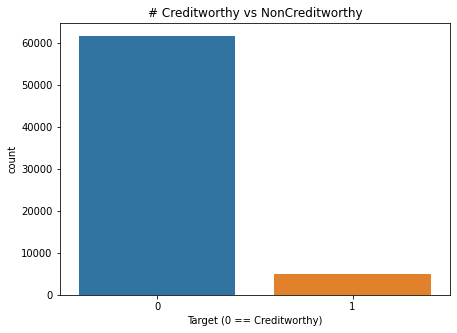

In [54]:
f, ax = plt.subplots(figsize = (7, 5))
sns.countplot(x = 'TARGET', data = app_train_short)
_ = plt.title('# Creditworthy vs NonCreditworthy')
_ = plt.xlabel('Target (0 == Creditworthy)')

In [55]:
base_line_accuracy = 1-np.sum(app_train_short.TARGET)/app_train_short.shape[0]
base_line_accuracy

0.9244869794791791

In [56]:
X = app_train_short.drop(columns = 'TARGET', axis = 1)
y = app_train_short.TARGET.values
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_train_hat = lr.predict(X_train)
y_train_hat_probs = lr.predict_proba(X_train)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print(confusion_matrix(y_train, y_train_hat))
print(train_auc_roc, "%")
print(train_accuracy, "%")

[[46230     0]
 [ 3768     0]]
60.18371891350962 %
92.46369854794192 %


In [61]:
y_test_hat = lr.predict(X_test)
y_test_hat_probs = lr.predict_proba(X_test)[:, 1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print(confusion_matrix(y_test, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[15400     0]
 [ 1266     0]]
60.584884901828026 %
92.40369614784592 %


In [62]:
print ( classification_report ( y_test ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

           0   0.924037  1.000000  0.960519     15400
           1   0.000000  0.000000  0.000000      1266

    accuracy                       0.924037     16666
   macro avg   0.462018  0.500000  0.480259     16666
weighted avg   0.853844  0.924037  0.887555     16666



/home/pl/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pl/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pl/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
target_class_count_0, target_class_count_1 = app_train_short['TARGET'].value_counts()
app_train_short_target_class_0 = app_train_short[app_train_short['TARGET'] == 0]
app_train_short_target_class_1 = app_train_short[app_train_short['TARGET'] == 1]
print('target 0:', app_train_short_target_class_0.shape)
print('target 1:', app_train_short_target_class_1.shape)

target 0: (61630, 12)
target 1: (5034, 12)


total target class of 1 and 0:
 0    5034
1    5034
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

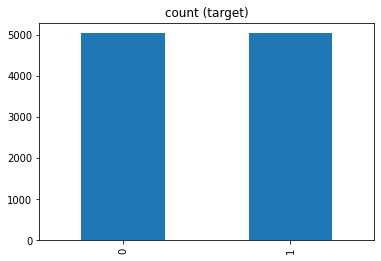

In [64]:
app_train_short_target_class_0_under = app_train_short_target_class_0.sample(target_class_count_1)
test_under = pd.concat([app_train_short_target_class_0_under, app_train_short_target_class_1], axis = 0)
print("total target class of 1 and 0:\n",test_under['TARGET'].value_counts())
test_under['TARGET'].value_counts().plot(kind='bar', title='count (target)')

In [65]:
test_under

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
298782,0,1,0.052632,0.034205,1.00,0.50,0.4,0.2,0.470588,0.0331,0.5,0.089286
240797,0,1,0.000000,0.012072,0.50,1.00,0.2,0.2,0.647059,0.0826,1.0,0.535714
171204,0,0,0.000000,0.062374,0.50,1.00,0.2,0.2,0.588235,0.1524,0.5,0.196429
183763,0,1,0.000000,0.029175,0.25,0.25,0.6,0.2,0.411765,0.0110,0.5,0.785714
74915,0,0,0.000000,0.029175,1.00,1.00,1.0,0.2,0.647059,0.0551,0.5,0.589286
...,...,...,...,...,...,...,...,...,...,...,...,...
307438,1,0,0.000000,0.032193,0.50,0.50,0.6,0.2,0.176471,0.0973,0.0,0.589286
307446,1,0,0.000000,0.054326,1.00,1.00,0.6,0.2,0.235294,0.0826,0.0,0.125000
307448,1,0,0.052632,0.040241,1.00,1.00,0.2,0.2,0.470588,0.0165,1.0,0.089286
307475,1,0,0.052632,0.026157,1.00,0.25,0.0,0.2,0.470588,0.0716,0.5,0.125000


In [66]:
test_under_shuffled = test_under.sample(frac=1)

In [67]:
X = test_under_shuffled.drop(columns = 'TARGET', axis = 1)
y = test_under_shuffled.TARGET.values
np.random.seed(42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y)

In [68]:
import os

In [69]:
X_train_under.to_csv(os.path.join(PATH, "X_train_under.csv"))
X_test_under.to_csv(os.path.join(PATH, "X_test_under.csv"))

In [70]:
np.savetxt(os.path.join(PATH, "y_train_under.csv"), y_train_under, delimiter=",")
np.savetxt(os.path.join(PATH, "y_test_under.csv"), y_test_under, delimiter=",")

In [71]:
X_train_under = pd.read_csv(PATH + 'X_train_under.csv', index_col=0)
X_test_under = pd.read_csv(PATH + 'X_test_under.csv', index_col=0)
y_train_under = pd.read_csv(PATH + 'y_train_under.csv', header = None)
y_test_under = pd.read_csv(PATH + 'y_test_under.csv', header=None)

In [72]:
lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)

/home/pl/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [73]:
y_test_hat = lr.predict(X_test_under)
y_test_hat_probs = lr.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[614 615]
 [468 820]]
60.48961055041466 %
56.97258641239571 %


In [74]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.567468  0.499593  0.531372      1229
         1.0   0.571429  0.636646  0.602277      1288

    accuracy                       0.569726      2517
   macro avg   0.569448  0.568120  0.566824      2517
weighted avg   0.569495  0.569726  0.567655      2517



In [75]:
# RandomForest, GradientBoosting, DecisionTree, SVM

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier()
rf.fit(X_train_under, y_train_under)

/tmp/ipykernel_4993/767335809.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_under, y_train_under)


RandomForestClassifier()

In [78]:
y_test_hat = rf.predict(X_test_under)
y_test_hat_probs = rf.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[677 552]
 [594 694]]
57.430231617888595 %
54.469606674612635 %


In [79]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.532651  0.550854  0.541600      1229
         1.0   0.556982  0.538820  0.547751      1288

    accuracy                       0.544696      2517
   macro avg   0.544817  0.544837  0.544675      2517
weighted avg   0.545102  0.544696  0.544747      2517



In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)

DecisionTreeClassifier()

In [82]:
y_test_hat = dt.predict(X_test_under)
y_test_hat_probs = dt.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[636 593]
 [603 685]]
52.467352137019944 %
52.483114819229236 %


In [83]:
print (classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.513317  0.517494  0.515397      1229
         1.0   0.535994  0.531832  0.533905      1288

    accuracy                       0.524831      2517
   macro avg   0.524655  0.524663  0.524651      2517
weighted avg   0.524921  0.524831  0.524868      2517



In [84]:
from sklearn.svm import SVC

In [85]:
svc = SVC(probability=True)
svc.fit(X_train_under, y_train_under)

/home/pl/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [86]:
y_test_hat = svc.predict(X_test_under)
y_test_hat_probs = svc.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[579 650]
 [410 878]]
60.50881517569706 %
57.88637266587207 %


In [87]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.585440  0.471115  0.522092      1229
         1.0   0.574607  0.681677  0.623580      1288

    accuracy                       0.578864      2517
   macro avg   0.580024  0.576396  0.572836      2517
weighted avg   0.579897  0.578864  0.574025      2517



In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gb = GradientBoostingClassifier()
gb.fit(X_train_under, y_train_under)

/home/pl/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [90]:
y_test_hat = gb.predict(X_test_under)
y_test_hat_probs = gb.predict_proba(X_test_under)[:, 1]
test_accuracy = accuracy_score(y_test_under, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_under, y_test_hat_probs)*100
print(confusion_matrix(y_test_under, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[663 566]
 [489 799]]
61.40293578074383 %
58.08502185141041 %


In [91]:
print ( classification_report ( y_test_under ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.575521  0.539463  0.556909      1229
         1.0   0.585348  0.620342  0.602337      1288

    accuracy                       0.580850      2517
   macro avg   0.580434  0.579902  0.579623      2517
weighted avg   0.580550  0.580850  0.580155      2517



# Full Dataset

In [92]:
app_train_full = app_train
app_train_full.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [93]:
app_train_full.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [94]:
app_train_full.isna().sum()/len(app_train_full)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [95]:
numeric = app_train_full.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [96]:
for col in numeric_columns: 
     app_train_full[col] = app_train_full[col].fillna(numeric.mean())


In [97]:
#app_train_full[numeric_columns] = app_train_full[numeric_columns].fillna(numeric.mean())

In [98]:
app_train_full.isna().sum()/len(app_train_full)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [99]:
cat_columns = app_train_full.select_dtypes(include=object)

In [100]:
cat_columns.isna().sum()/len(cat_columns)*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            68.386172
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
EMERGENCYSTATE_MODE           47.398304
dtype: float64

In [101]:
app_train_full = app_train_full.dropna(axis=1)

In [102]:
app_train_full.isna().sum()/len(app_train_full)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_

In [103]:
app_train_full.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGIO

In [104]:
app_train_full.isnull().sum().sum()

0

In [105]:
cat_columns

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [106]:
for col in app_train_full.select_dtypes(include=object).columns:
    uniq = pd.unique(app_train_full[col])
    replace_dict = dict(zip(uniq, range(1, len(uniq) + 1)))
    app_train_full[col] = app_train_full[col].replace(replace_dict)

/tmp/ipykernel_4993/221153781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_full[col] = app_train_full[col].replace(replace_dict)


In [107]:
for col in app_train_full.columns:
    app_train_full[col] = (app_train_full[col] - min(app_train_full[col])) / (max(app_train_full[col]) - min(app_train_full[col]))
app_train_full.head(15)

/tmp/ipykernel_4993/708437148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_full[col] = (app_train_full[col] - min(app_train_full[col])) / (max(app_train_full[col]) - min(app_train_full[col]))


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.001512,0.090287,0.000000,0.00,0.0,0.0,0.256321,0.888839,0.045086,0.852140,0.705433,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.5,0.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000003,0.0,0.0,0.5,0.0,1.0,0.000000,0.002089,0.311736,0.142857,0.25,0.2,0.0,0.045016,0.477114,0.043648,0.951929,0.959566,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.166667,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.0,1.0,0.0,1.0,0.0,0.000000,0.000358,0.022472,0.000000,0.00,0.0,0.0,0.134897,0.348534,0.046161,0.827335,0.648326,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.166667,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.0,0.5,0.0,0.0,0.000000,0.000935,0.066837,0.000000,0.00,0.4,0.0,0.107023,0.350846,0.038817,0.601451,0.661387,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.0,0.0,0.0,0.0,0.000000,0.000819,0.116854,0.000000,0.00,0.0,0.0,0.392880,0.298591,0.038820,0.825268,0.519522,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000017,0.0,0.0,0.0,0.0,0.0,0.000000,0.000627,0.111235,0.142857,0.00,0.2,0.0,0.491595,0.467193,0.042604,0.798557,0.933722,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.000000,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.070175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000020,0.0,0.0,0.5,1.0,0.0,0.052632,0.001243,0.378458,0.285714,0.25,0.2,0.0,0.491595,0.645490,0.038580,0.950835,0.913992,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.5,0.500000,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000022,0.0,0.0,0.0,1.0,0.0,0.000000,0.002858,0.370787,0.142857,0.25,0.2,0.0,0.039215,0.359583,0.045577,0.813675,0.669446,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.166667,0.695652,0.0,0.0,0.0,0.0,1.0,1.0,0.070175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000025,0.0,0.0,0.5,0.0,0.0,0.000000,0.000742,0.243348,0.428571,0.00,0.2,0.0,0.254009,0.289177,1.000000,0.698970,0.511741,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000028,0.0,1.0,0.0,0.0,0.0,0.000000,0.000935,0.089888,0.000000,0.00,0.0,0.0,0.268617,0.606539,0.041479,0.414843,0.445324,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
for col in app_train_full.columns:
    if (app_train_full[col].dtype == object): # .dtype pd.String ? 
        uniq = pd.unique(app_train_full[col]) # .unique() ?
        replace_dict = dict(zip(uniq, range(1, len(uniq) + 1)))
        app_train_full[col] = app_train_full[col].replace(replace_dict)
        app_train_full[col] = (app_train_full[col] - min(app_train_full[col])) / (max(app_train_full[col]) - min(app_train_full[col]))
    else:
        app_train_full[col] = (app_train_full[col] - min(app_train_full[col])) / (max(app_train_full[col]) - min(app_train_full[col]))
app_train_full.head(15)

/tmp/ipykernel_4993/981722579.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_full[col] = (app_train_full[col] - min(app_train_full[col])) / (max(app_train_full[col]) - min(app_train_full[col]))


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.001512,0.090287,0.000000,0.00,0.0,0.0,0.256321,0.888839,0.045086,0.852140,0.705433,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.5,0.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000003,0.0,0.0,0.5,0.0,1.0,0.000000,0.002089,0.311736,0.142857,0.25,0.2,0.0,0.045016,0.477114,0.043648,0.951929,0.959566,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.166667,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.0,1.0,0.0,1.0,0.0,0.000000,0.000358,0.022472,0.000000,0.00,0.0,0.0,0.134897,0.348534,0.046161,0.827335,0.648326,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.166667,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.0,0.5,0.0,0.0,0.000000,0.000935,0.066837,0.000000,0.00,0.4,0.0,0.107023,0.350846,0.038817,0.601451,0.661387,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.0,0.0,0.0,0.0,0.000000,0.000819,0.116854,0.000000,0.00,0.0,0.0,0.392880,0.298591,0.038820,0.825268,0.519522,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000017,0.0,0.0,0.0,0.0,0.0,0.000000,0.000627,0.111235,0.142857,0.00,0.2,0.0,0.491595,0.467193,0.042604,0.798557,0.933722,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.000000,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.070175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000020,0.0,0.0,0.5,1.0,0.0,0.052632,0.001243,0.378458,0.285714,0.25,0.2,0.0,0.491595,0.645490,0.038580,0.950835,0.913992,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.5,0.500000,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000022,0.0,0.0,0.0,1.0,0.0,0.000000,0.002858,0.370787,0.142857,0.25,0.2,0.0,0.039215,0.359583,0.045577,0.813675,0.669446,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.166667,0.695652,0.0,0.0,0.0,0.0,1.0,1.0,0.070175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000025,0.0,0.0,0.5,0.0,0.0,0.000000,0.000742,0.243348,0.428571,0.00,0.2,0.0,0.254009,0.289177,1.000000,0.698970,0.511741,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000028,0.0,1.0,0.0,0.0,0.0,0.000000,0.000935,0.089888,0.000000,0.00,0.0,0.0,0.268617,0.606539,0.041479,0.414843,0.445324,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
app_train_full = app_train_full.drop(columns = ['SK_ID_CURR'],axis = 1)

In [110]:
app_train_full

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.001512,0.090287,0.000000,0.00,0.0,0.0,0.256321,0.888839,0.045086,0.852140,0.705433,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.5,0.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.5,0.0,1.0,0.0,0.002089,0.311736,0.142857,0.25,0.2,0.0,0.045016,0.477114,0.043648,0.951929,0.959566,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.166667,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.000358,0.022472,0.000000,0.00,0.0,0.0,0.134897,0.348534,0.046161,0.827335,0.648326,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.166667,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.5,0.0,0.0,0.0,0.000935,0.066837,0.000000,0.00,0.4,0.0,0.107023,0.350846,0.038817,0.601451,0.661387,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000819,0.116854,0.000000,0.00,0.0,0.0,0.392880,0.298591,0.038820,0.825268,0.519522,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,1.0,0.0,0.001127,0.052360,0.000000,0.00,0.8,0.4,0.446855,0.896392,0.046133,0.657263,0.724607,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.298246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.5,0.0,0.0,0.0,0.000396,0.056067,0.428571,0.00,0.6,0.0,0.344429,0.251071,1.000000,0.822147,0.431708,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.5,0.166667,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,0.0,0.0,0.5,0.0,0.0,0.0,0.001089,0.157969,0.000000,0.25,0.8,0.0,0.065247,0.578523,0.026076,0.726937,0.284424,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.333333,0.391304,0.0,0.0,0.0,0.0,1.0,1.0,0.017544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,1.0,0.0,0.5,0.0,0.0,0.0,0.001243,0.081175,0.285714,0.00,0.2,0.0,0.069553,0.747914,0.034258,0.896158,0.870641,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.391304,0.0,0.0,0.0,1.0,1.0,0.0,0.473684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


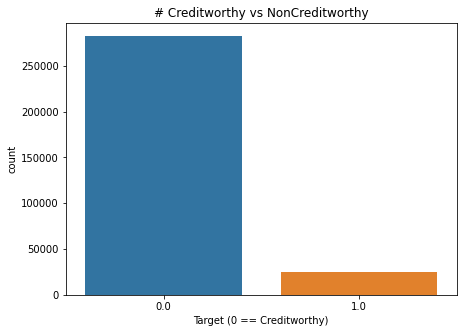

In [111]:
f, ax = plt.subplots(figsize = (7, 5))
sns.countplot(x = 'TARGET', data = app_train_full)
_ = plt.title('# Creditworthy vs NonCreditworthy')
_ = plt.xlabel('Target (0 == Creditworthy)')

In [112]:
base_line_accuracy = 1-np.sum(app_train_full.TARGET)/app_train_full.shape[0]
base_line_accuracy

0.9192711805431351

In [113]:
target_class_count_0, target_class_count_1 = app_train_full['TARGET'].value_counts()
app_train_full_target_class_0 = app_train_full[app_train_full['TARGET'] == 0]
app_train_full_target_class_1 = app_train_full[app_train_full['TARGET'] == 1]
print('target 0:', app_train_full_target_class_0.shape)
print('target 1:', app_train_full_target_class_1.shape)

target 0: (282686, 54)
target 1: (24825, 54)


total target class of 1 and 0:
 1.0    282686
0.0    282686
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

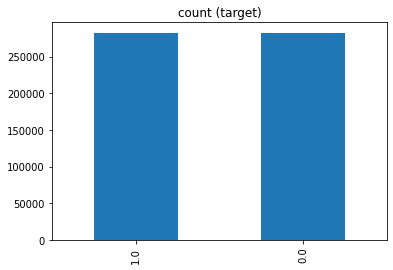

In [114]:
app_train_full_target_class_1_over = app_train_full_target_class_1.sample(target_class_count_0, replace = True)
test_over = pd.concat([app_train_full_target_class_1_over, app_train_full_target_class_0], axis = 0)
print("total target class of 1 and 0:\n",test_over['TARGET'].value_counts())
test_over['TARGET'].value_counts().plot(kind='bar', title='count (target)')

In [115]:
test_over_shuffled = test_over.sample(frac=1)

In [116]:
test_over_shuffled

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
270444,0.0,0.0,0.0,1.0,0.0,0.000000,0.000742,0.020562,0.428571,0.00,0.2,0.0,0.129705,0.147914,1.000000,0.975884,0.382798,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.5,0.166667,0.565217,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179797,1.0,0.0,0.0,1.0,0.0,0.052632,0.001127,0.197348,0.000000,0.75,0.2,0.8,0.083289,0.618489,0.037591,0.885863,0.878144,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.500000,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,0.614035,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171532,0.0,0.0,0.5,1.0,1.0,0.157895,0.002281,0.186225,0.000000,0.00,0.2,0.0,0.143358,0.540981,0.046214,0.924206,0.738363,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.478261,0.0,1.0,1.0,0.0,1.0,1.0,0.192982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117158,1.0,1.0,0.0,1.0,0.0,0.000000,0.001127,0.101124,0.000000,0.00,0.2,0.0,0.114722,0.774859,0.043254,0.940378,0.633319,1.0,1.0,0.0,1.0,0.0,1.0,0.5,0.5,0.333333,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.280702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121980,0.0,0.0,0.0,1.0,0.0,0.000000,0.002281,0.282022,0.000000,0.00,0.2,0.0,0.361433,0.232413,0.011356,0.940054,0.372238,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.666667,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.175439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146989,0.0,0.0,0.5,0.0,0.0,0.000000,0.001012,0.234282,0.000000,0.00,0.2,0.0,0.260475,0.342165,0.045321,0.545112,0.624288,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.166667,0.434783,0.0,0.0,0.0,0.0,1.0,1.0,0.017544,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74188,1.0,0.0,0.0,1.0,0.0,0.000000,0.000339,0.122015,0.428571,0.00,0.8,0.0,0.226010,0.160767,1.000000,0.592818,0.582604,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.833333,0.565217,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,1.0,0.0,1.0,1.0,0.000000,0.001704,0.056180,0.000000,0.00,0.4,0.0,0.257000,0.441883,0.044337,0.707725,0.873975,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.000000,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.438596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99086,1.0,0.0,0.0,0.0,1.0,0.000000,0.001704,0.119101,0.285714,0.25,0.0,0.0,0.083165,0.776550,0.046242,0.802124,0.780047,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.666667,0.782609,0.0,1.0,1.0,0.0,1.0,1.0,0.403509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
X = test_over_shuffled.drop(columns = 'TARGET', axis = 1)
y = test_over_shuffled.TARGET.values
np.random.seed(42)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y)

In [118]:
import os
X_train_over.to_csv(os.path.join(PATH, "X_train_over.csv"))
X_test_over.to_csv(os.path.join(PATH, "X_test_over.csv"))

In [119]:
np.savetxt(os.path.join(PATH, "y_train_over.csv"), y_train_over, delimiter=",")
np.savetxt(os.path.join(PATH, "y_test_over.csv"), y_test_over, delimiter=",")

In [120]:
X_train_over = pd.read_csv(PATH + 'X_train_over.csv', index_col=0)
X_test_over = pd.read_csv(PATH + 'X_test_over.csv', index_col=0)
y_train_over = pd.read_csv(PATH + 'y_train_over.csv', header = None)
y_test_over = pd.read_csv(PATH + 'y_test_over.csv', header=None)

In [121]:
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)

/home/pl/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pl/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
y_test_hat = lr.predict(X_test_over)
y_test_hat_probs = lr.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[43115 27825]
 [27434 42969]]
65.18986797667867 %
60.90432494003948 %


In [123]:
print (classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.611136  0.607767  0.609447     70940
         1.0   0.606958  0.610329  0.608639     70403

    accuracy                       0.609043    141343
   macro avg   0.609047  0.609048  0.609043    141343
weighted avg   0.609055  0.609043  0.609044    141343



In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier()
rf.fit(X_train_over, y_train_over)

/tmp/ipykernel_4993/1358211493.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_over, y_train_over)


RandomForestClassifier()

In [126]:
y_test_hat = rf.predict(X_test_over)
y_test_hat_probs = rf.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[70856    84]
 [   21 70382]]
99.99302236945181 %
99.92571262814572 %


In [127]:
print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.999704  0.998816  0.999260     70940
         1.0   0.998808  0.999702  0.999255     70403

    accuracy                       0.999257    141343
   macro avg   0.999256  0.999259  0.999257    141343
weighted avg   0.999258  0.999257  0.999257    141343



In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt = DecisionTreeClassifier()
dt.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [130]:
y_test_hat = dt.predict(X_test_over)
y_test_hat_probs = dt.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[63463  7477]
 [   20 70383]]
94.71584962622114 %
94.69588164960415 %


In [131]:
print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.999685  0.894601  0.944228     70940
         1.0   0.903969  0.999716  0.949434     70403

    accuracy                       0.946959    141343
   macro avg   0.951827  0.947158  0.946831    141343
weighted avg   0.952009  0.946959  0.946821    141343



In [134]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train_over, y_train_over)

/home/pl/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#svc = SVC(probability=True)


In [ ]:
#svc.fit(X_train_over, y_train_over)

In [ ]:
#y_test_hat = svc.predict(X_test_over)
#y_test_hat_probs = svc.predict_proba(X_test_over)[:, 1]
#test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
#print(confusion_matrix(y_test_over, y_test_hat))
#print(test_auc_roc, "%")
#print(test_accuracy, "%")

In [ ]:
#print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_over, y_train_over)

In [ ]:
y_test_hat = gb.predict(X_test_over)
y_test_hat_probs = gb.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

In [ ]:
print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))